# Ensemble Learning (Diamonds dataset)
#### Donald Bango
#### 8 May 2024
#### Dr. Aiman Darwiche

## Dataset Overview:
This analysis uses the Diamonds dataset available on Kaggle, provided by Shivam Agrawal. The dataset includes data on 53,940 diamonds with 10 features. 

Link: https://www.kaggle.com/datasets/shivam2503/diamonds

### Features:

Price: Listed in US dollars, ranging from $326 to $18,823.

Carat: Weight of the diamonds, from 0.2 to 5.01 carats.

Cut: Quality of the cut, categorized into Fair, Good, Very Good, Premium, and Ideal.

Color: Color grade of the diamonds, from J (lowest) to D (highest).

Clarity: Clarity of the diamonds, ranging from I1 (least clear) to IF (most clear).

Dimensions: Includes length (x), width (y), and depth (z) in millimeters.

Depth Percentage: Represents the total depth of the diamond as a percentage of the average of its length and width. It is 
calculated by doubling the depth and dividing by the sum of the length and the width.

Table: Width of the diamond's top relative to its widest point, with values from 43% to 95%.

## Goals for Using Ensemble Learning:

Predictive Accuracy: Use ensemble methods like Random Forests, Gradient Boosting, and Stacking to predict the price of diamonds with high accuracy.
Handling Data Variability: Use the methods to integrate different types of data (numerical and categorical) to capture complex patterns.
Reducing Overfitting: Techniques such as bagging and boosting help in averaging out biases and improving model reliability against overfitting.
Insight and Interpretation: Gain deeper insights into which features most significantly impact diamond prices and understand the interactions between various quality metrics.

## Ensemble Techniques Used for Diamond Price Prediction

### Chosen Ensemble Methods:

Random Forest: This method involves creating multiple decision trees during training and outputting the average of their predictions for the regression task. 

Gradient Boosting (GBM): GBM's enhance predictive accuracy by building decision trees sequentially. Each tree is designed to correct the residuals or errors of the previous ones, focusing on areas where prior models were most inaccurate. This method effectively reduces prediction errors over iterations, making it well suited for continuous targets such as price

XGBoost: Etreme Gradient Boosting constructs a predictive model by integrating the outcomes of numerous decision trees, each built sequentially to improve upon the residuals left by the previous trees. This iterative approach optimizes performance and minimizes prediction error. Its efficiency and scalability make it particularly useful for handling large datasets with high-dimensional features

### Steps in Analysis:

Data Preprocessing: Encode categorical variables and scale numerical features to prepare the dataset for integration into ensemble models.
Model Training: Deploy individual models (Random Forest, GBM, and XGBoost), leveraging decision trees to predict diamond prices based on distinct assumptions and strengths.
Model Stacking: Use the predictions from the individual models as input for a meta-model, optimizing how these predictions are combined to improve overall accuracy.
Evaluation: Utilize RMSE to evaluate and compare the predictive accuracy of both individual and stacked models.

### Rationale and Conclusion for Ensemble Choice:

The chosen ensemble methods integrate both bagging (Random Forest) and boosting (GBM and XGBoost) techniques, which excel in managing the complexities and non-linear relationships in large datasets, such as those involving diamond prices and the selected diamond dataset. By employing stacking, this approach enhances the reliability of predictions by leveraging the  strengths of each model,  mitigating the bias-variance tradeoff and increasing model stability. This strategic approach maximizes predictive performance by fine-tuning the collective output of the models through stacking. The result is a powerful tool for regression analysis that yields insights into the determinants of diamond pricing.

## Key Questions Addressed Through Ensemble Learning

### How does the combination of carat, cut, color, and clarity influence the pricing of diamonds?

Rationale: By examining how these features interact to affect diamond prices, we can provide valuable insights for jewelers and buyers about the key value drivers in diamond valuation, aiding in more informed pricing and purchasing decisions.

### Can we predict the price of a diamond based on its physical and qualitative attributes with a high degree of accuracy?

Rationale: Accurately predicting diamond prices based on physical and qualitative attributes enables a deeper understanding of market dynamics and pricing strategies. This can aid in optimizing inventory management, enhancing pricing models, and providing insights into consumer preferences, supporting data-driven decision-making within the diamond industry

In [103]:
# Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#!pip install xgboost
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold


In [124]:
# Import Dataset
diamonds = pd.read_csv('/Users/don/Downloads/diamonds.csv')

# Drop the 'Unnamed: 0' column
diamonds.drop('Unnamed: 0', axis=1, inplace=True)

diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Exploratory Data Analysis and Preprocessing

In [49]:
diamonds.shape

(53940, 10)

In [25]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [26]:
print(diamonds.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [27]:
diamonds.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [28]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [29]:
# Duplicated instances (We would expect for there to be a few duplicates)
diamonds.duplicated().sum()

146

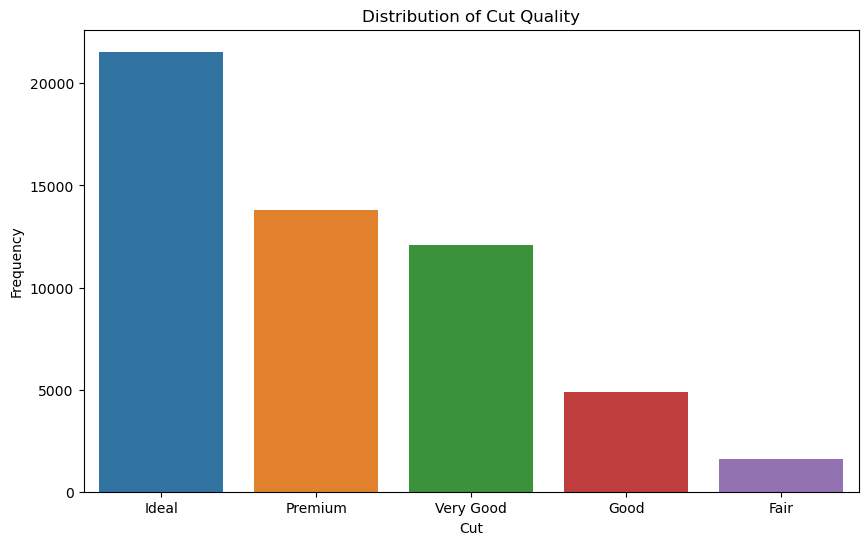

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cut', data=diamonds, order=diamonds['cut'].value_counts().index)
plt.title('Distribution of Cut Quality')
plt.xlabel('Cut')
plt.ylabel('Frequency')
plt.show()


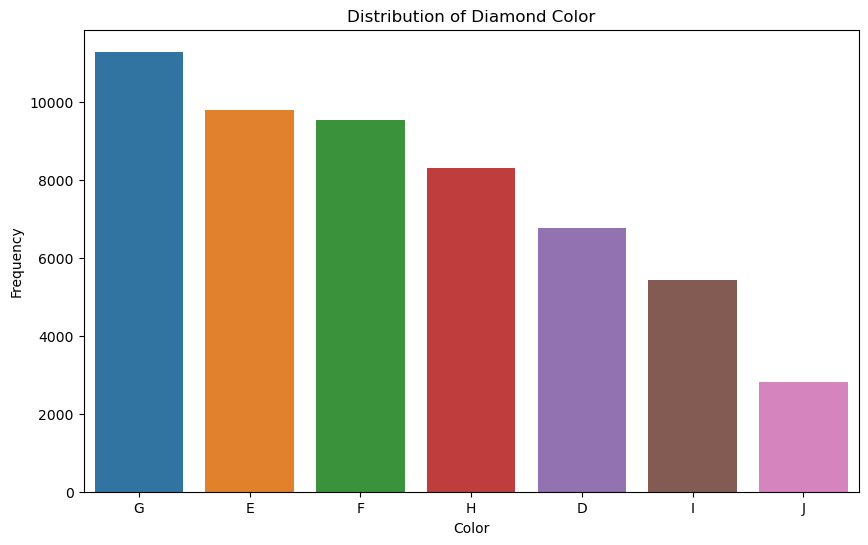

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='color', data=diamonds, order=diamonds['color'].value_counts().index)
plt.title('Distribution of Diamond Color')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.show()


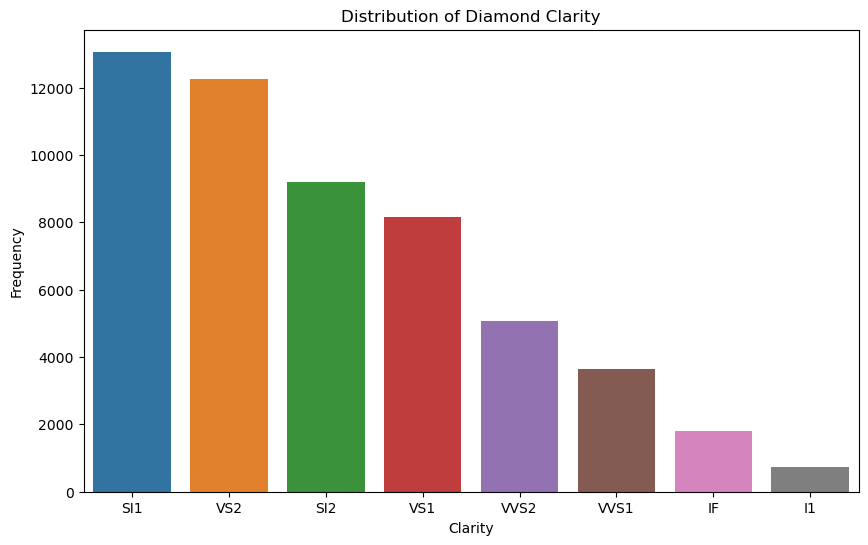

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='clarity', data=diamonds, order=diamonds['clarity'].value_counts().index)
plt.title('Distribution of Diamond Clarity')
plt.xlabel('Clarity')
plt.ylabel('Frequency')
plt.show()


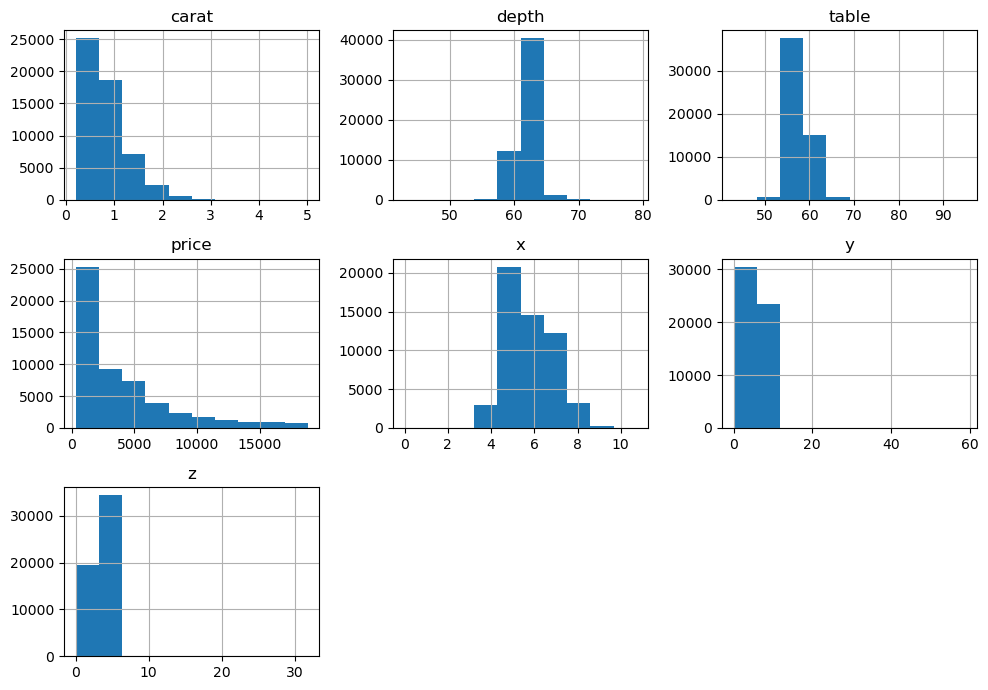

In [45]:
# Visualize distributions with histograms
diamonds.hist(figsize=(10, 7))
plt.tight_layout()
plt.show()

In [33]:
# correlation matrix
correlation = diamonds.select_dtypes(include=['float64', 'int64']).corr()

correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


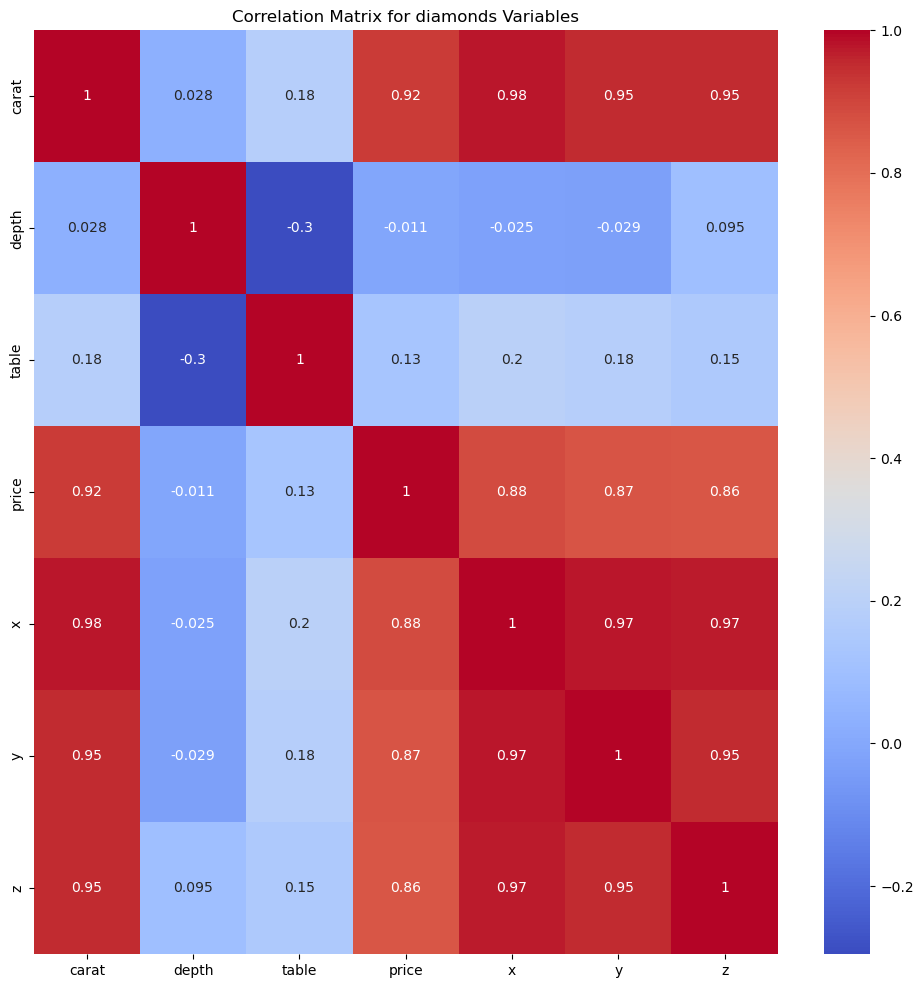

In [47]:
# heatmap
plt.figure(figsize=(12, 12)) 
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for diamonds Variables')
plt.show()

In [53]:
# Checking for Outliers
# Calculating Q1 and Q3
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)

# Calculating the IQR
IQR = Q3 - Q1

# Determining outliers using the IQR method
outliers = ((diamonds < (Q1 - 1.5 * IQR)) | (diamonds > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_data = diamonds[outliers]

print("Number of outliers detected:", len(outlier_data))
#print(outlier_data)

Number of outliers detected: 6416


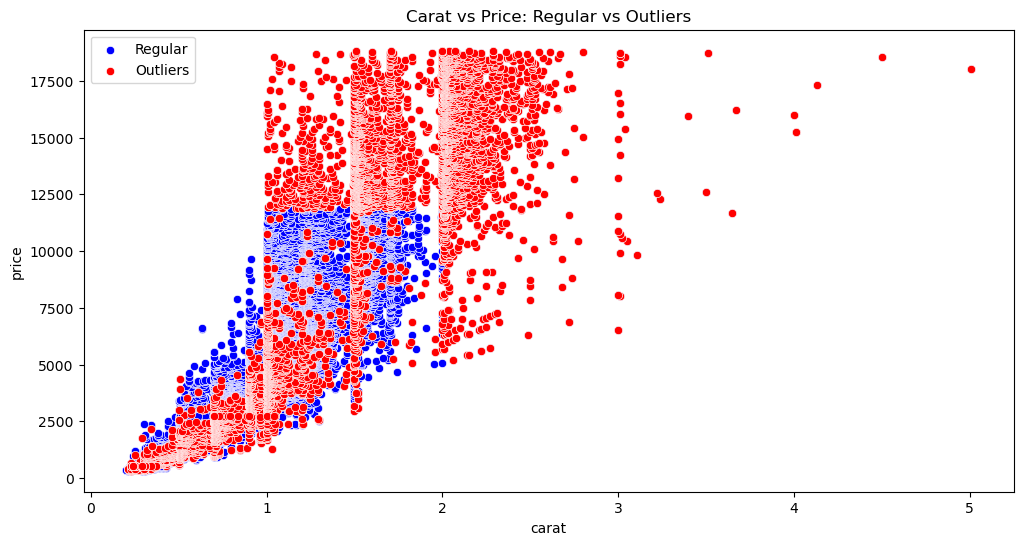

In [55]:
# Scatter plot comparison
plt.figure(figsize=(12, 6))
sns.scatterplot(x='carat', y='price', data=diamonds, color='blue', label='Regular')
sns.scatterplot(x='carat', y='price', data=outlier_data, color='red', label='Outliers')
plt.legend()
plt.title('Carat vs Price: Regular vs Outliers')
plt.show()


In [58]:
# Calculate average carat and average price for the entire dataset
average_carat_all = diamonds['carat'].mean()
average_price_all = diamonds['price'].mean()

# Calculate average carat and average price for the outliers
average_carat_outliers = outlier_data['carat'].mean()
average_price_outliers = outlier_data['price'].mean()

# Printing the results
print("Average Carat Weight of Entire Dataset: {:.2f}".format(average_carat_all))
print("Average Price of Entire Dataset: ${:.2f}".format(average_price_all))
print("Average Carat Weight of Outliers: {:.2f}".format(average_carat_outliers))
print("Average Price of Outliers: ${:.2f}".format(average_price_outliers))


Average Carat Weight of Entire Dataset: 0.80
Average Price of Entire Dataset: $3932.80
Average Carat Weight of Outliers: 1.46
Average Price of Outliers: $10029.87


In [60]:
# Removing outliers
diamonds_cleaned = diamonds[~outliers]

# Calculate average carat and average price for the cleaned dataset
average_carat_cleaned = diamonds_cleaned['carat'].mean()
average_price_cleaned = diamonds_cleaned['price'].mean()

print("Average Carat Weight after Removing Outliers: {:.2f}".format(average_carat_cleaned))
print("Average Price after Removing Outliers: ${:.2f}".format(average_price_cleaned))


Average Carat Weight after Removing Outliers: 0.71
Average Price after Removing Outliers: $3109.66


### EDA and outlier handling conclusion
In our exploratory data analysis of the diamonds dataset, which comprises 53,940 observations, we found a strong correlation between carat size, dimensions, and diamond prices. The dataset has no missing values and includes 146 duplicate entries that we decided not to remove for now as I believe they are legitimate entries. Distributions for categorical features like clarity and color, as well as quantitative variables, showed skewness, indicating non-uniformity and non-normality. We identified approximately 6,500 outliers, mostly high-priced diamonds, which were removed to reduce their disproportionate influence on the analysis, enhancing the predictive modeling's reliability without substantially affecting the dataset’s integrity.

## Feature Engineering

In [73]:
# Create a copy with the original untouched data
diamonds_2 = diamonds_cleaned.copy() 

In [74]:
# Feature creation/ Combining Features (high correlatiion)
diamonds_2['volume'] = diamonds_2['x'] * diamonds_2['y'] * diamonds_2['z']
diamonds_2.drop(['x', 'y', 'z'], axis=1, inplace=True)

diamonds_2.head(3)

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580


In [75]:
#Encoding Categorical Variables (nominal)
diamonds_2 = pd.get_dummies(diamonds_2, columns=['cut', 'color', 'clarity'])


In [ ]:
# Interaction terms

In [76]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
features_to_scale = ['carat', 'volume', 'depth', 'table']
diamonds_2[features_to_scale] = scaler.fit_transform(diamonds_2[features_to_scale])


In [78]:
# Verify the changes in the new DataFrame
diamonds_2.head(3)


,carat,depth,table,price,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.289950,-0.259076,-1.118057,326,-1.289859,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.343844,-1.796287,1.849991,326,-1.351535,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.128269,0.554741,0.365967,334,-1.147648,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


### Summarizing 

In the feature engineering phase for the diamonds dataset, an initial copy of the cleaned data, diamonds_2, was created to preserve the original data. A new feature, volume, was computed from the product of dimensions x, y, and z, after which these individual dimension features were dropped to avoid redundancy. The dataset was then expanded to include dummy variables for the categorical features cut, color, and clarity to facilitate numerical analysis. Finally, key features including carat, volume, depth, and table were standardized using StandardScaler to ensure uniform scale across all numerical inputs, enhancing model performance by treating all features equally during the learning process.

### Data Parsing:

The dataset will now be split into training and testing sets using an 80/20 split, providing a reliable basis for training and validation.

In [80]:
# using diamonds_2, the prepared DataFrame
X = diamonds_2.drop('price', axis=1)  # Features
y = diamonds_2['price']               # Target variable

# Split the data into training and testing sets (80% training 20% testing split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Initialization and Training of Predictive Models/ Ensemble components

In [83]:
# Initialize the three models
model1 = RandomForestRegressor(n_estimators=100, random_state=11)  # Random Forest model
model2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=11)  # GBM model
model3 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=11)  # XGBoost model

# Fit the models on the training data
model1.fit(X_train, y_train)  # Training Random Forest
model2.fit(X_train, y_train)  # Training Gradient Boosting
model3.fit(X_train, y_train)  # Training XGBoost



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [88]:
# Make predictions on the test data
pred1 = model1.predict(X_test)  # Predictions from Random Forest
pred2 = model2.predict(X_test)  # Predictions from Gradient Boosting
pred3 = model3.predict(X_test)  # Predictions from XGBoost


In [109]:
# Evaluate the models
rmse_rf = np.sqrt(mean_squared_error(y_test, pred1))  # RMSE for Random Forest
rmse_gb = np.sqrt(mean_squared_error(y_test, pred2))  # RMSE for Gradient Boosting
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred3))  # RMSE for XGBoost

# Print RMSE results
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Gradient Boosting RMSE: {rmse_gb}')
print(f'XGBoost RMSE: {rmse_xgb}')

Random Forest RMSE: 361.1942728528579
Gradient Boosting RMSE: 471.0371555107666
XGBoost RMSE: 366.2248993566582


The RMSE values indicate that the Random Forest model performed the best with the lowest error at 361.19, while Gradient Boosting showed the highest error at 471.04, and XGBoost had a performance close to Random Forest with an RMSE of 366.22.

In [110]:
# Calculate weights as the inverse of RMSE (lower RMSE gets higher weight)
rf_weight = 1 / rmse_rf
gb_weight = 1 / rmse_gb
xgb_weight = 1 / rmse_xgb

# Normalize weights so they sum to 1
total_weight = rf_weight + gb_weight + xgb_weight
rf_weight /= total_weight
gb_weight /= total_weight
xgb_weight /= total_weight

# Calculate the final prediction as a weighted average of individual predictions
final_pred = (pred1 * rf_weight) + (pred2 * gb_weight) + (pred3 * xgb_weight)

# Evaluate the final weighted average model
final_rmse = np.sqrt(mean_squared_error(y_test, final_pred))
print(f'Weighted Average RMSE: {final_rmse}')


Weighted Average RMSE: 365.5623676196903


The Weighted Average RMSE of 365.56 performed closely to the Random Forest and XGBoost models.

In [111]:
# Prepare dataset for stacking
def get_stacked_data(model, X_train, y_train, X_test, n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=11)
    test_preds = np.zeros(X_test.shape[0])
    train_preds = np.zeros(X_train.shape[0])
    for train_index, val_index in kf.split(X_train):
        kf_X_train, kf_X_val = X_train[train_index], X_train[val_index]
        kf_y_train, kf_y_val = y_train[train_index], y_train[val_index]
        model.fit(kf_X_train, kf_y_train)
        train_preds[val_index] = model.predict(kf_X_val)
        test_preds += model.predict(X_test) / n_folds
    return train_preds, test_preds


In [112]:
# Get stacked data for each model
train_pred1, test_pred1 = get_stacked_data(model1, X_train.values, y_train.values, X_test.values)
train_pred2, test_pred2 = get_stacked_data(model2, X_train.values, y_train.values, X_test.values)
train_pred3, test_pred3 = get_stacked_data(model3, X_train.values, y_train.values, X_test.values)

In [94]:
# Stack predictions
stacked_X_train = np.column_stack((train_pred1, train_pred2, train_pred3))
stacked_X_test = np.column_stack((test_pred1, test_pred2, test_pred3))

In [113]:
# Train meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_X_train, y_train)
stacked_pred = meta_model.predict(stacked_X_test)

In [114]:
# Evaluate the stacking model
stacked_rmse = np.sqrt(mean_squared_error(y_test, stacked_pred))
print(f'Stacked Model RMSE: {stacked_rmse}')

Stacked Model RMSE: 350.4481078494469


The dataset was prepared for stacking by using K-Fold cross-validation to generate out-of-sample predictions from each base model (Random Forest, GBM, XGBoost). These predictions were then used as features to train a meta-model (Linear Regression), effectively combining the strengths of each individual model. The final stacked model achieved an RMSE of 350.45, which is lower than the RMSEs reported by all individual models, illustrating an improvement in predictive accuracy.

The reduction in RMSE with the stacked model compared to individual models indicates a successful reduction in variance and enhancement of model stability. By leveraging diverse learning patterns from each base model, the stacking approach was able to mitigate overfitting and generalize better on unseen data, showcasing the power of ensemble methods in improving prediction outcomes.

In [125]:
# Calculate and print performance metrics for each model
def print_model_metrics(y_true, predictions, model_name):
    mse = mean_squared_error(y_true, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, predictions)
    r2 = r2_score(y_true, predictions)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - Root Mean Squared Error: {rmse}")
    print(f"{model_name} - Mean Absolute Error: {mae}")
    print(f"{model_name} - R-squared: {r2}")

# Metrics for Random Forest
print_model_metrics(y_test, pred1, 'Random Forest')

# Metrics for Gradient Boosting
print_model_metrics(y_test, pred2, 'Gradient Boosting')

# Metrics for XGBoost
print_model_metrics(y_test, pred3, 'XGBoost')

# Metrics for Stacked Model
print_model_metrics(y_test, stacked_pred, 'Stacked Model')



Random Forest - Mean Squared Error: 130461.30274170477
Random Forest - Root Mean Squared Error: 361.1942728528579
Random Forest - Mean Absolute Error: 205.23053005325667
Random Forest - R-squared: 0.9825345844026241
Gradient Boosting - Mean Squared Error: 221876.0018716741
Gradient Boosting - Root Mean Squared Error: 471.0371555107666
Gradient Boosting - Mean Absolute Error: 281.1518367156225
Gradient Boosting - R-squared: 0.9702965055358582
XGBoost - Mean Squared Error: 134120.67690879444
XGBoost - Root Mean Squared Error: 366.2248993566582
XGBoost - Mean Absolute Error: 212.21193658867867
XGBoost - R-squared: 0.9820446882471253
Stacked Model - Mean Squared Error: 122813.87629525755
Stacked Model - Root Mean Squared Error: 350.4481078494469
Stacked Model - Mean Absolute Error: 199.76622517809122
Stacked Model - R-squared: 0.9835583782658665


The Stacked Model outperforms individual models with the lowest RMSE and the highest R-squared of 0.9835, indicating that it explains approximately 98% of the variance in diamond prices, showcasing its superior accuracy and predictive capability.

In [116]:
# Function to perform K-Fold CV and return the average RMSE
def get_kfold_rmse(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=11)
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)  # Convert MSE to RMSE
    return np.mean(rmse_scores)

# Cross-validated RMSE for each model
cv_rmse_rf = get_kfold_rmse(model1, X, y)
cv_rmse_gb = get_kfold_rmse(model2, X, y)
cv_rmse_xgb = get_kfold_rmse(model3, X, y)

print(f"Random Forest Cross-Validated RMSE: {cv_rmse_rf}")
print(f"Gradient Boosting Cross-Validated RMSE: {cv_rmse_gb}")
print(f"XGBoost Cross-Validated RMSE: {cv_rmse_xgb}")


Random Forest Cross-Validated RMSE: 367.27132982558203
Gradient Boosting Cross-Validated RMSE: 485.29752831483637
XGBoost Cross-Validated RMSE: 369.9238326330827


## Conclusion:

The results from the stacked ensemble learning model indicates a successful application. The stacked ensemble model demonstrated the highest performance in predicting diamond prices based on physical and qualitative attributes. The stacked model achieved the lowest Root Mean Squared Error (RMSE) of 350.448 and an R-Squared value indicating that 98% of the variance is explained by the model, showing it can predict diamond prices with high accuracy. This answers our initial question affirmatively, confirming that we can predict the price of a diamond with a high degree of accuracy using these attributes.

Interpreting these predictions in the context of the diamond market, the accuracy achieved by the stacked model suggests that our model can serve as a reliable tool for stakeholders in the diamond industry. This includes helping jewelers set competitive and fair prices and aiding buyers in making informed purchasing decisions. The ability of the model to interpret complex interactions between features like carat, cut, color, and clarity ensures that the pricing fluctuatuions of different diamonds are adequately captured.

The reduction in variance seen with the ensemble models can be attributed to the integration of diverse predictive strategies from the individual models. By combining models like Random Forest, GBM, and XGBoost, which individually have different strengths and weaknesses, the ensemble approach leverages their collective strengths while mitigating individual variances. This approach evens out the predictions, making them less affected by the unique characteristics and peculiarities of any single model. It also enhances the stability and reliability of the predictions across various data subsets and market conditions. Consequently, the ensemble method provides a reliable solution by effectively managing the balance between bias and variance, leading to more consistent and accurate predictions.

## References:

Agrawal, S. (2017, May 25). Diamonds. Kaggle. https://www.kaggle.com/datasets/shivam2503/diamonds 

Brownlee, J. (2021, April 26). Stacking Ensemble Machine Learning with python. MachineLearningMastery.com. https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/ 

Singh, A. (2023, November 22). A comprehensive guide to ensemble learning (with python codes). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/#:~:text=Stacking%20is%20an%20ensemble%20learning,is%20split%20into%2010%20parts. 